# Explore Basis Functions: Try to adjust (visually) basis functions to the N41 Fault Line

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import torch

from volcapy.grid.grid_from_dsm import Grid
from volcapy.plotting.plot_3D import get_standard_slices, plot_surfaces


data_folder = "/home/cedric/PHD/Dev/VolcapySIAM/data/InversionDatas/stromboli_173018/"

grid = Grid.load(os.path.join(data_folder, "grid.pickle"))
G = torch.from_numpy(                                                       
            np.load(os.path.join(data_folder, "F_niklas.npy"))).float().detach()                                            
volcano_coords = torch.from_numpy(                                          
            grid.cells).float().detach()
data_coords = np.load(os.path.join(data_folder, "niklas_data_coords.npy"))

In [4]:
from volcapy.universal_kriging.basis_functions import planar, cylindrical, tanh_sigmoid

In [8]:
x0 = volcano_coords[:, 0].mean() # Volcano center.                          
y0 = volcano_coords[:, 1].mean()                                            
z0 = volcano_coords[:, 2].mean()
theta = 90 # equatorial plane.
phi = 135
basis_fn_N41 = planar(volcano_coords, x0, y0, z0, phi, theta)                                                                                                                                                               
dists_cyl = cylindrical(volcano_coords, x0, y0)
basis_fn_cst = 1 * np.ones(volcano_coords.shape[0])

meshed_basis_fn_N41 = grid.mesh_values(basis_fn_N41)
meshed_basis_fn_cyl = grid.mesh_values(dists_cyl)
meshed_basis_fn_cst = grid.mesh_values(basis_fn_cst)

In [4]:
meshed_basis_fn_cyl.shape

(102, 94, 35)

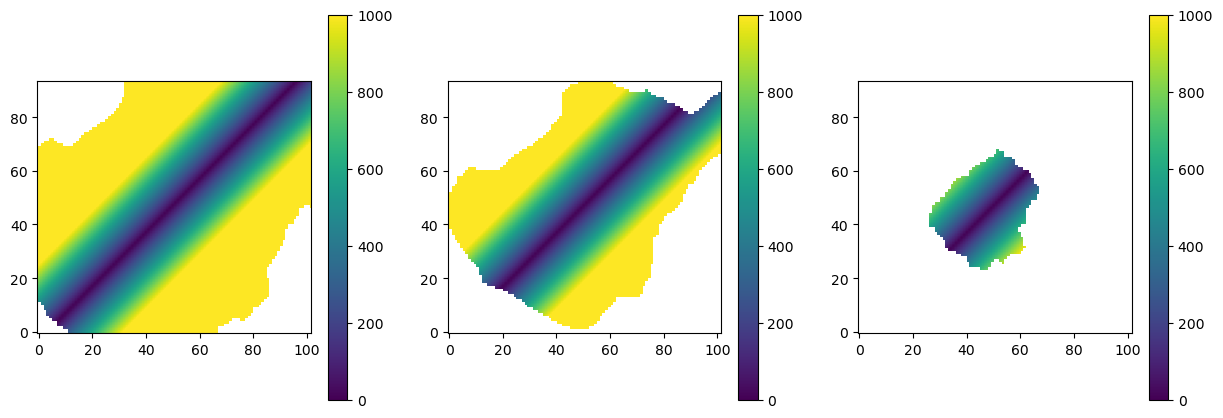

In [5]:
%matplotlib inline
plt.figure(figsize=(15, 5))                                          
plt.subplot(131)                                                       
plt.imshow(meshed_basis_fn_N41[:, :, 10].T, vmin=0, vmax=1000)
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(132)                                                      
ax = plt.imshow(meshed_basis_fn_N41[:, :, 16].T, vmin=0, vmax=1000)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(133)                                        
plt.imshow(meshed_basis_fn_N41[:, :, 26].T, vmin=0, vmax=1000)
plt.gca().invert_yaxis()
plt.colorbar()

In [6]:
grid.Z_mesh[0, 0, 16]

0.0

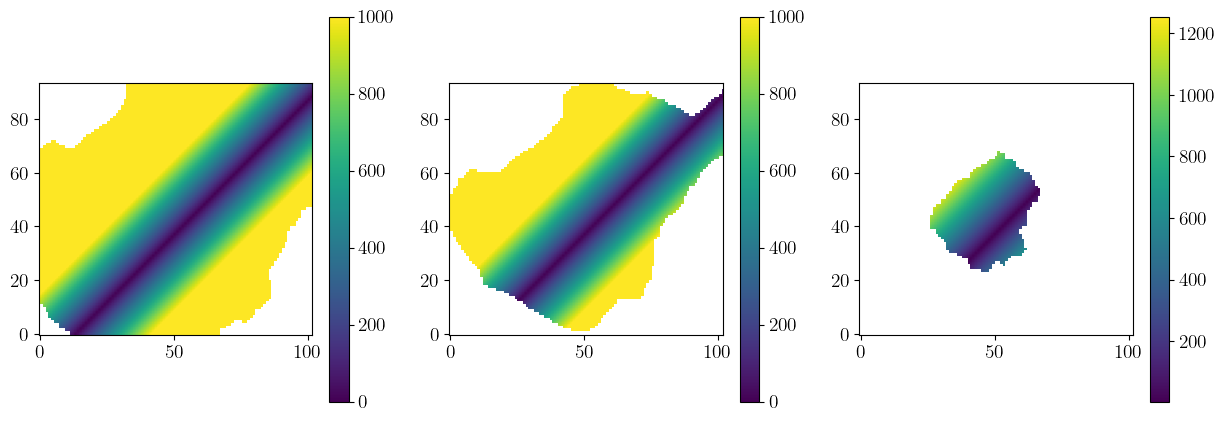

In [6]:
x0 = volcano_coords[:, 0].mean() + 500 # Volcano center.                          
y0 = volcano_coords[:, 1].mean()                                          
z0 = volcano_coords[:, 2].mean()
theta = 90 # equatorial plane.
phi = 135
basis_fn = planar(volcano_coords, x0, y0, z0, phi, theta)


meshed_basis_fn = grid.mesh_values(basis_fn)
plt.figure(figsize=(15, 5))                                          
plt.subplot(131)                                                       
plt.imshow(meshed_basis_fn[:, :, 10].T, vmin=0, vmax=1000)
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(132)                                                      
ax = plt.imshow(meshed_basis_fn[:, :, 16].T, vmin=0, vmax=1000)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(133)                                        
plt.imshow(meshed_basis_fn[:, :, 26].T)
plt.gca().invert_yaxis()
plt.colorbar()

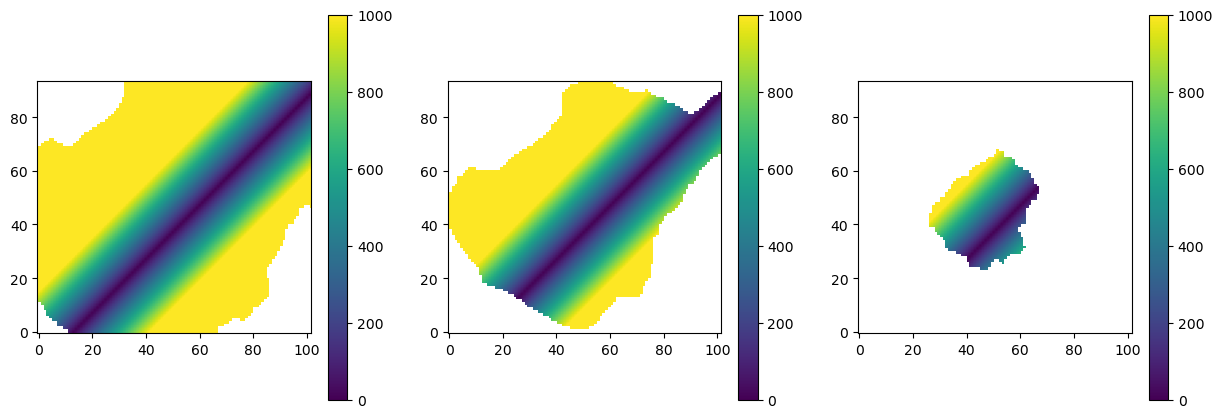

In [8]:
%matplotlib inline
meshed_basis_fn = grid.mesh_values(basis_fn)
plt.figure(figsize=(15, 5))                                          
plt.subplot(131)                                                       
plt.imshow(meshed_basis_fn[:, :, 10].T, vmin=0, vmax=1000)
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(132)                                                      
ax = plt.imshow(meshed_basis_fn[:, :, 16].T, vmin=0, vmax=1000)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(133)                                        
plt.imshow(meshed_basis_fn[:, :, 26].T, vmin=0, vmax=1000)
plt.gca().invert_yaxis()
plt.colorbar()

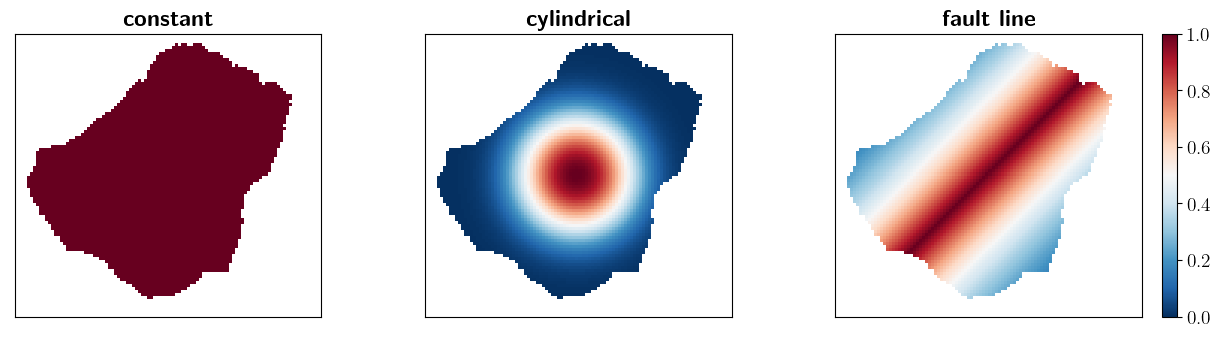

In [18]:
%matplotlib inline
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['font.size'] = 14


x0 = volcano_coords[:, 0].mean() # Volcano center.                          
y0 = volcano_coords[:, 1].mean()                                            
z0 = volcano_coords[:, 2].mean()

dists_N41 = planar(volcano_coords, x0, y0, z0, phi, theta,
                   # cutoff_phi=45, cutoff_theta=90, cutoff_x0=x0-300, cutoff_y0=y0-300, cutoff_z0=z0, fill_value=6000
                  )                                                                                                                                                               
basis_fn_N41 = tanh_sigmoid(dists_N41, saturation_length=2500, inverted=True)
basis_fn_cyl = tanh_sigmoid(dists_cyl**2, saturation_length=2e6, inverted=True)

meshed_basis_fn_cyl = grid.mesh_values(basis_fn_cyl)
meshed_basis_fn_N41 = grid.mesh_values(basis_fn_N41)
fig = plt.figure(figsize=(15, 5))                                          

ax = plt.subplot(131)                                                       
im = plt.imshow(meshed_basis_fn_cst[:, :, 17].T, cmap='RdBu_r', vmin=0, vmax=1)
plt.gca().invert_yaxis()
plt.yticks([])
plt.xticks([])
plt.title(r"$\textbf{constant}$")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax = cax)

ax = plt.subplot(132)                                        
im = plt.imshow(meshed_basis_fn_cyl[:, :, 17].T, cmap='RdBu_r', vmin=0, vmax=1)
plt.gca().invert_yaxis()
plt.yticks([])
plt.xticks([])
plt.title(r"$\textbf{cylindrical}$")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax = cax)

ax = plt.subplot(133)                                                      
im = plt.imshow(meshed_basis_fn_N41[:, :, 17].T, cmap='RdBu_r', vmin=0, vmax=1)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.yticks([])
plt.xticks([])
plt.title(r"$\textbf{fault line}$")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax = cax)

# Remove other colorbars, so all plots are the same size.
fig.delaxes(fig.axes[1])
fig.delaxes(fig.axes[2])

plt.savefig("basis_functions", bbox_inches='tight', dpi=200)

In [ ]:
from volcapy.universal_kriging.basis_functions import tanh_sigmoid

theta = 90 # equatorial plane.
phi = 135
x0 = volcano_coords[:, 0].mean() # Volcano center.                          
y0 = volcano_coords[:, 1].mean()                                            
z0 = volcano_coords[:, 2].mean()

dists_N41 = planar(volcano_coords, x0, y0, z0, phi, theta,
                   cutoff_phi=45, cutoff_theta=90, cutoff_x0=x0-300, cutoff_y0=y0-300, cutoff_z0=z0, fill_value=6000)                                                                                                                                                               
basis_fn = tanh_sigmoid(dists_N41, saturation_length=1000, inverted=True)


meshed_basis_fn = grid.mesh_values(basis_fn)
plt.figure(figsize=(15, 5))                                          
plt.subplot(131)                                                       
plt.imshow(meshed_basis_fn[:, :, 10].T)
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(132)                                                      
ax = plt.imshow(meshed_basis_fn[:, :, 16].T)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(133)                                        
plt.imshow(meshed_basis_fn[:, :, 26].T)
plt.gca().invert_yaxis()
plt.colorbar()

In [ ]:
dists_cyl.max()